# Housing Development Board (HDB) Analysis

### Objective:
To find out the resale price trend over the years and predict future resale price specifically for Queenstown 4-room and 5-room flats

### Import and Clean Dataset 

In [1]:
#Import necessary libraries for analysis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from matplotlib import style

In [3]:
df_hdb1 = pd.read_csv(r"C:\Users\melli\OneDrive\Desktop\Python Portfolio\8. Housing and Income in Singapore\resale-flat-prices-based-on-approval-date-1990-1999.csv")
df_hdb2 = pd.read_csv(r"C:\Users\melli\OneDrive\Desktop\Python Portfolio\8. Housing and Income in Singapore\resale-flat-prices-based-on-approval-date-2000-feb-2012.csv")
df_hdb3 = pd.read_csv(r"C:\Users\melli\OneDrive\Desktop\Python Portfolio\8. Housing and Income in Singapore\resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv")
df_hdb4 = pd.read_csv(r"C:\Users\melli\OneDrive\Desktop\Python Portfolio\8. Housing and Income in Singapore\resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv")
df_hdb5 = pd.read_csv(r"C:\Users\melli\OneDrive\Desktop\Python Portfolio\8. Housing and Income in Singapore\resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")

In [4]:
#Combine datasets after checking all 5 datasets are continuous
df_hdb = pd.concat([df_hdb1, df_hdb2, df_hdb3, df_hdb4, df_hdb5], ignore_index=True)
df_hdb.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
826576,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,440000.0,66 years 03 months
826577,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,458000.0,65 years 06 months
826578,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,490000.0,66 years 04 months
826579,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,558000.0,66 years 03 months
826580,2020-09,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,555000.0,66 years 09 months


In [5]:
#Ensure no duplications in the storey_range
df_hdb['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [6]:
#Replace the duplicated range into 1 range "01 to 06"
df_hdb['storey_range'].replace("04 TO 06", "01 TO 06", inplace=True)
df_hdb['storey_range'].replace("01 TO 05", "01 TO 06", inplace=True)
df_hdb['storey_range'].replace("01 TO 03", "01 TO 06", inplace=True)
df_hdb.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
826576,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,440000.0,66 years 03 months
826577,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,458000.0,65 years 06 months
826578,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,01 TO 06,122.0,Improved,1987,490000.0,66 years 04 months
826579,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,01 TO 06,146.0,Maisonette,1987,558000.0,66 years 03 months
826580,2020-09,YISHUN,EXECUTIVE,387,YISHUN RING RD,01 TO 06,146.0,Maisonette,1988,555000.0,66 years 09 months


In [7]:
#Create a year column and extract the year from month column
df_hdb['year'] = df_hdb['month'].str[0:4]

In [8]:
#Check for null values
df_hdb.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709054
year                        0
dtype: int64

In [9]:
#Drop the remaining lease column and recreate a new column based on 99 year lease - commencement date
df_hdb.drop(labels=['remaining_lease'], axis=1, inplace=True)
df_hdb.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
year                   0
dtype: int64

In [10]:
#Recreate a new column based on 99 year lease - commencement date
df_hdb['current_remaining_lease'] = df_hdb['lease_commence_date'].apply(lambda x: 2020-x)
df_hdb['current_remaining_lease'] = df_hdb['current_remaining_lease'].apply(lambda x: 99-x)
df_hdb.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,current_remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,56
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,01 TO 06,31.0,IMPROVED,1977,6000.0,1990,56
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,56
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,56
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,01 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,55


In [11]:
#Check for type for each variables
df_hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826581 entries, 0 to 826580
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    826581 non-null  object 
 1   town                     826581 non-null  object 
 2   flat_type                826581 non-null  object 
 3   block                    826581 non-null  object 
 4   street_name              826581 non-null  object 
 5   storey_range             826581 non-null  object 
 6   floor_area_sqm           826581 non-null  float64
 7   flat_model               826581 non-null  object 
 8   lease_commence_date      826581 non-null  int64  
 9   resale_price             826581 non-null  float64
 10  year                     826581 non-null  object 
 11  current_remaining_lease  826581 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 75.7+ MB


### Start Analysis

Find out oldest town based on remaining lease

In [12]:
#Finding out mean of remaining lease and commence date by town
town = df_hdb.groupby('town').mean().sort_values(by='current_remaining_lease')
town.tail()

,floor_area_sqm,lease_commence_date,resale_price,current_remaining_lease
town,,,,
CHOA CHU KANG,112.494489,1993.974332,323125.387344,72.974332
BUKIT PANJANG,103.712099,1993.999587,307383.707821,72.999587
SEMBAWANG,106.168301,2001.172840,351349.202966,80.172840
SENGKANG,103.678785,2003.074677,401902.201948,82.074677
PUNGGOL,101.162046,2006.874676,438753.064326,85.874676


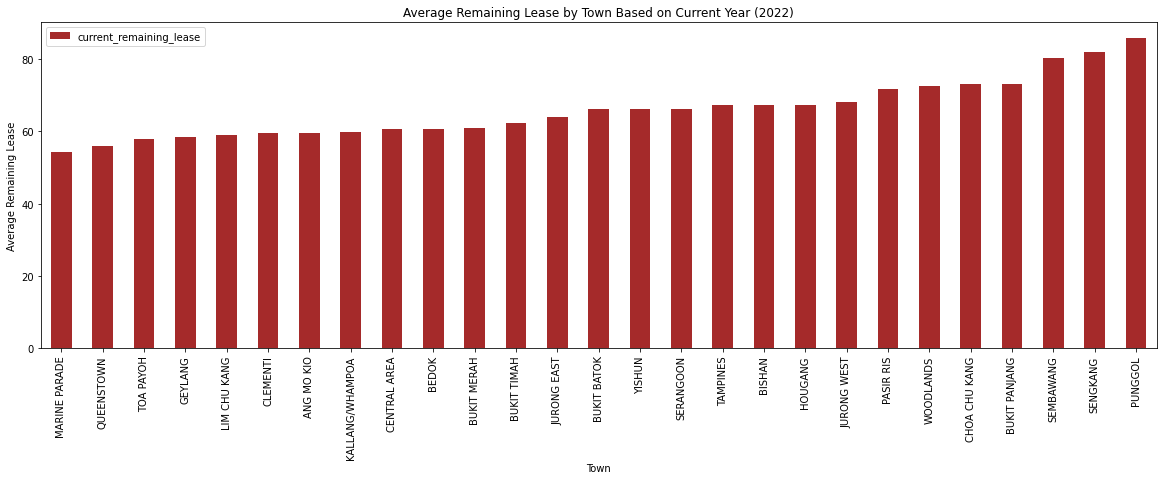

In [13]:
town.plot(kind='bar', y = 'current_remaining_lease', figsize=(20, 6), color = 'brown')
plt.title('Average Remaining Lease by Town Based on Current Year (2022)')
plt.xticks(rotation='vertical')
plt.xlabel('Town')
plt.ylabel('Average Remaining Lease')
plt.show()

In [19]:
#Filter out 4-room and 5-room
df_hdb_3rm = df_hdb[df_hdb['flat_type'] == '3 ROOM']
df_hdb_4rm = df_hdb[df_hdb['flat_type'] == '4 ROOM']
df_hdb_5rm = df_hdb[df_hdb['flat_type'] == '5 ROOM']

In [22]:
#Filter out Queenstown in 3-room, 4-room and 5-room dataset
qt_hdb_3rm = df_hdb_3rm[df_hdb_3rm['town'] == 'QUEENSTOWN']
qt_hdb_4rm = df_hdb_4rm[df_hdb_4rm['town'] == 'QUEENSTOWN']
qt_hdb_5rm = df_hdb_5rm[df_hdb_5rm['town'] == 'QUEENSTOWN']

Find out the national price trend between 3, 4 and 5 room flats

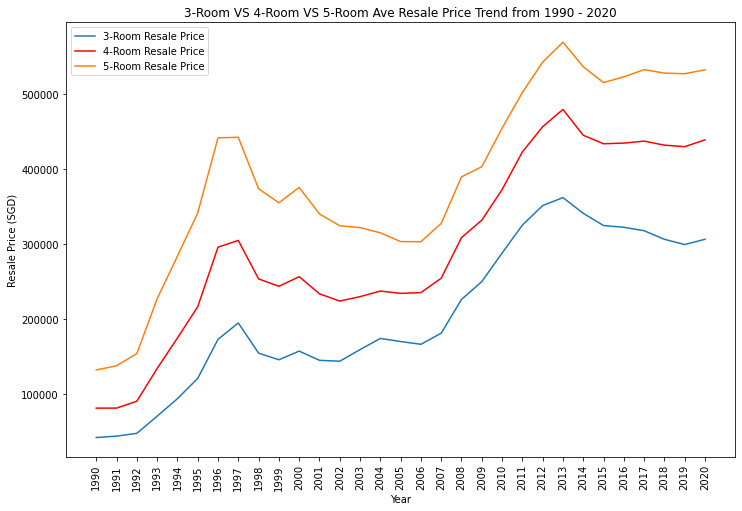

In [20]:
ax1 = sns.lineplot(x = 'year', y = 'resale_price', data=df_hdb_3rm, ci= None)
ax2 = sns.lineplot(x = 'year', y = 'resale_price', data=df_hdb_4rm, ci= None, color = 'red')
ax3 = sns.lineplot(x = 'year', y = 'resale_price', data=df_hdb_5rm, ci= None)


fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.title('3-Room VS 4-Room VS 5-Room Ave Resale Price Trend from 1990 - 2020')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Resale Price (SGD)')

plt.legend(labels = ['3-Room Resale Price', '4-Room Resale Price', '5-Room Resale Price'])

plt.show()

Compare the resale price between Queenstown and National (for 4-room and 5-room flats)

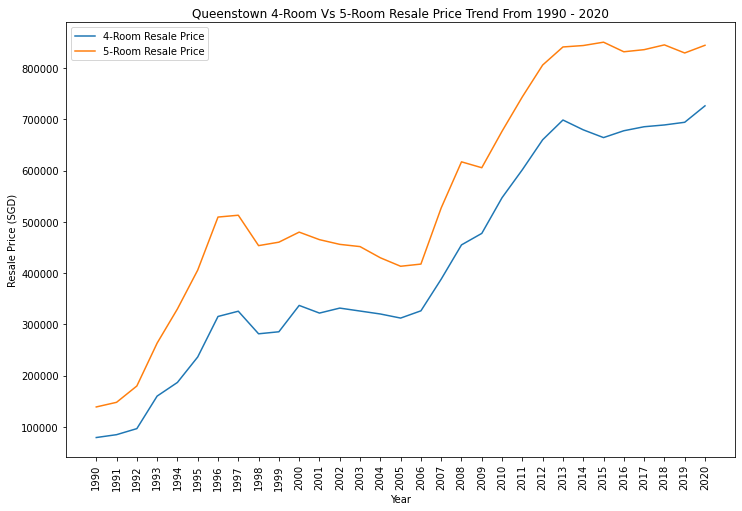

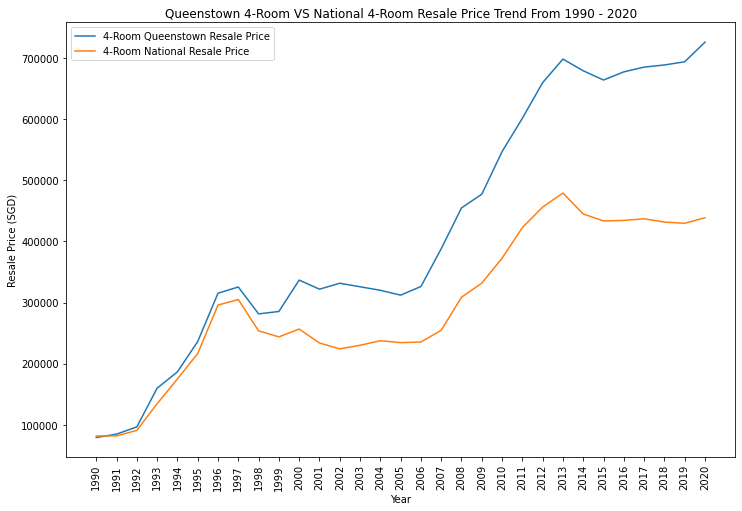

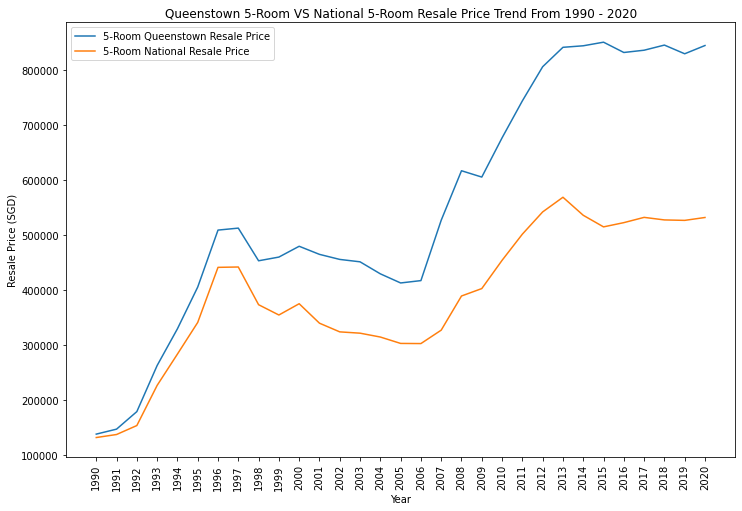

In [23]:
#Create line plot for Queenstown 4 room VS 5 room resale price

ax1 = sns.lineplot(x = 'year', y = 'resale_price', data=qt_hdb_4rm, ci= None)
ax2 = sns.lineplot(x = 'year', y = 'resale_price', data=qt_hdb_5rm, ci= None)

fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.title('Queenstown 4-Room Vs 5-Room Resale Price Trend From 1990 - 2020')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Resale Price (SGD)')

plt.legend(labels = ['4-Room Resale Price', '5-Room Resale Price'])

plt.show()

#Create line plot for Queenstown 4 room VS National 4 room resale price

ax3 = sns.lineplot(x = 'year', y = 'resale_price', data=qt_hdb_4rm, ci= None)
ax4 = sns.lineplot(x = 'year', y = 'resale_price', data=df_hdb_4rm, ci= None)

fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.title('Queenstown 4-Room VS National 4-Room Resale Price Trend From 1990 - 2020')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Resale Price (SGD)')

plt.legend(labels = ['4-Room Queenstown Resale Price', '4-Room National Resale Price'])

plt.show()

#Create line plot for Queenstown 5 room VS National 5 room resale price

ax5 = sns.lineplot(x = 'year', y = 'resale_price', data=qt_hdb_5rm, ci= None)
ax6 = sns.lineplot(x = 'year', y = 'resale_price', data=df_hdb_5rm, ci= None)

fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.title('Queenstown 5-Room VS National 5-Room Resale Price Trend From 1990 - 2020')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Resale Price (SGD)')

plt.legend(labels = ['5-Room Queenstown Resale Price', '5-Room National Resale Price'])

plt.show()

Find out if there are any correlations between resale price and transaction count (demand)

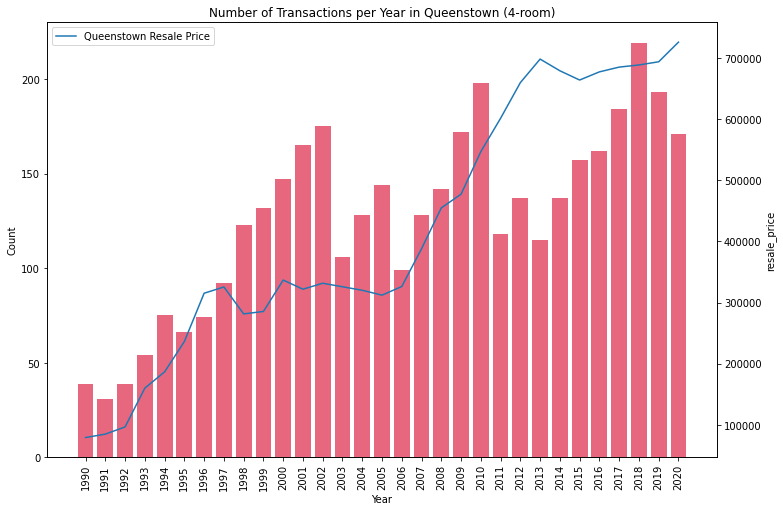

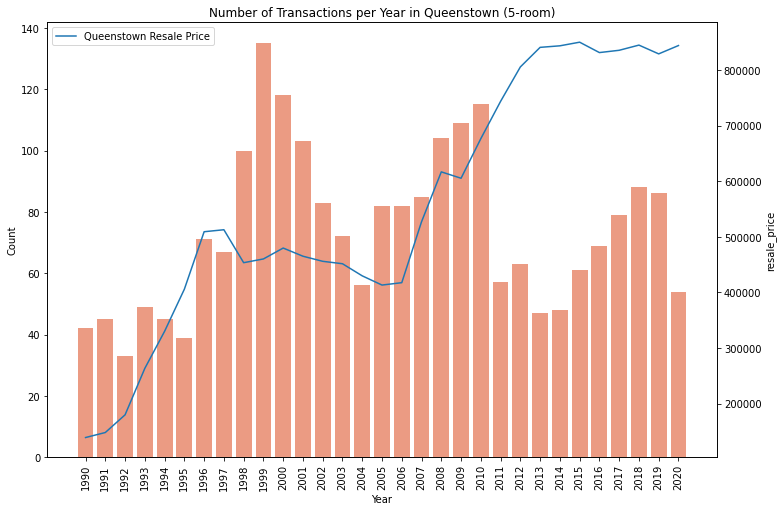

In [24]:
#Create a bar line chart to find any trends between number of transactions and resale price (4-Room)
ax1 = sns.countplot(x = 'year', data=qt_hdb_4rm, palette=["#fc5272"])

fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.title('Number of Transactions per Year in Queenstown (4-room)')
plt.xticks(rotation='vertical')

plt.xlabel('Year')
plt.ylabel('Count')

ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'year', y = 'resale_price', data=qt_hdb_4rm, ci= None)

plt.legend(labels = ['Queenstown Resale Price', 'National Resale Price'])

plt.show()

#Create a bar line chart to find any trends between number of transactions and resale price (5-Room)
ax1 = sns.countplot(x = 'year', data=qt_hdb_5rm, palette=["#fc9272"])

fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.title('Number of Transactions per Year in Queenstown (5-room)')
plt.xticks(rotation='vertical')

plt.xlabel('Year')
plt.ylabel('Count')

ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'year', y = 'resale_price', data=qt_hdb_5rm, ci= None)

plt.legend(labels = ['Queenstown Resale Price', 'National Resale Price'])

plt.show()

Split the resale price by street name and storey range

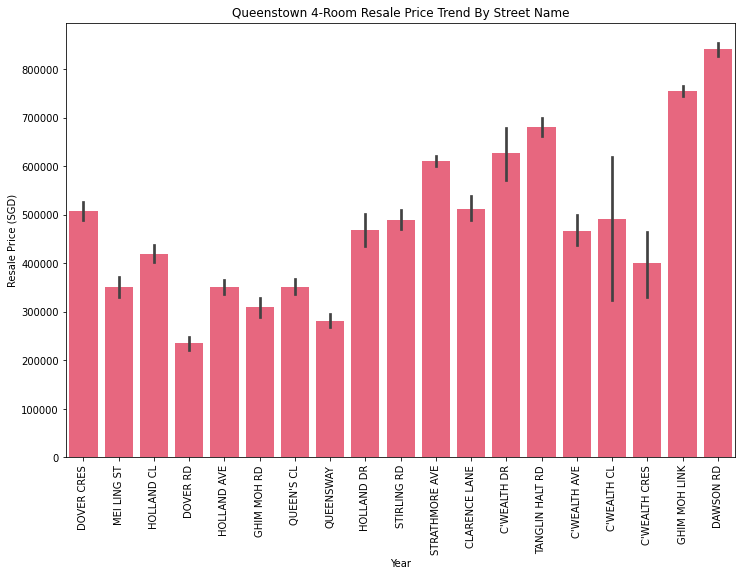

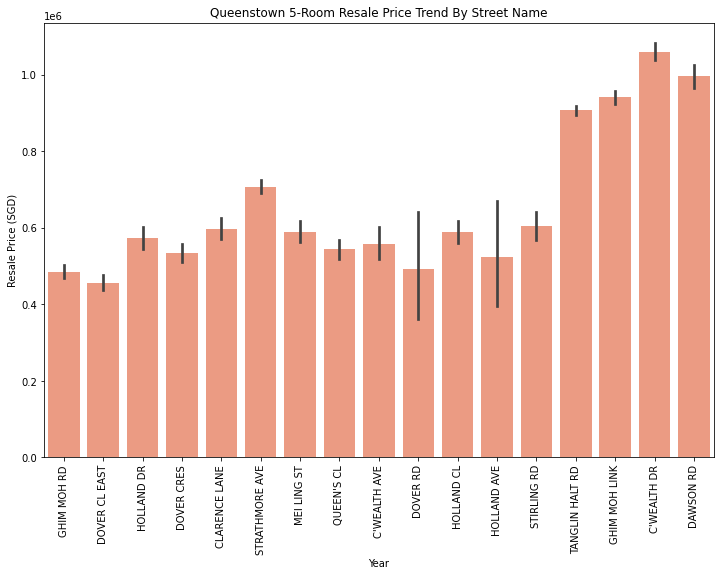

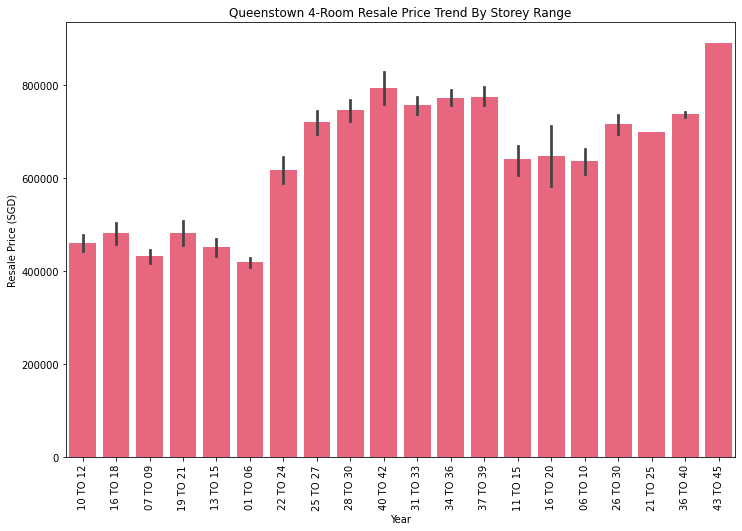

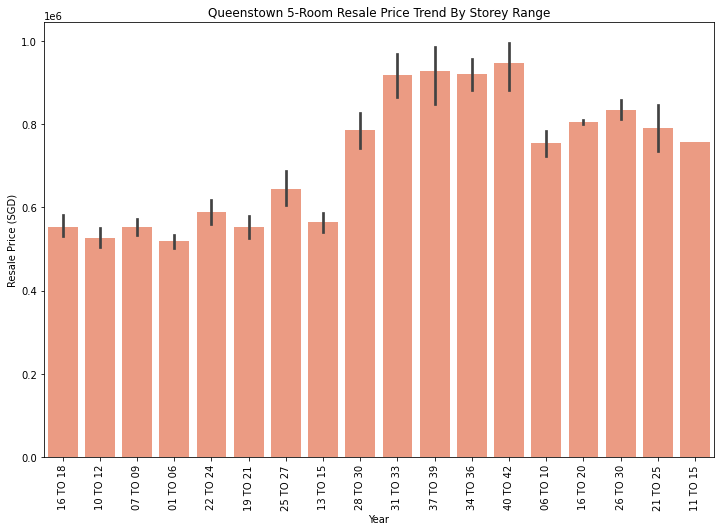

In [25]:
#Bar Chart to compare resale price by street name (4-Room)

ax1 = sns.barplot(x = 'street_name', y = 'resale_price', data=qt_hdb_4rm,  palette=["#fc5272"])
fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.title('Queenstown 4-Room Resale Price Trend By Street Name')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Resale Price (SGD)')

plt.show()

#Bar Chart to compare resale price by street name (5-Room)

ax1 = sns.barplot(x = 'street_name', y = 'resale_price', data=qt_hdb_5rm,  palette=["#fc9272"])
fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.title('Queenstown 5-Room Resale Price Trend By Street Name')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Resale Price (SGD)')

plt.show()

#Bar Chart to compare resale price by storey range (5-Room)

ax1 = sns.barplot(x = 'storey_range', y = 'resale_price', data=qt_hdb_4rm, palette=["#fc5272"])
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.title('Queenstown 4-Room Resale Price Trend By Storey Range')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Resale Price (SGD)')
plt.show()


#Bar Chart to compare resale price by storey range

ax1 = sns.barplot(x = 'storey_range', y = 'resale_price', data=qt_hdb_5rm, palette=["#fc9272"])
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.title('Queenstown 5-Room Resale Price Trend By Storey Range')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Resale Price (SGD)')
plt.show()

Compare Queenstown 4-room and 5-room by street name

In [29]:
#Combine Queenstown 4-room and 5-room into 1 dataframe
qt_hdb = df_hdb[df_hdb['town'] == 'QUEENSTOWN']
qt_hdb = qt_hdb[(qt_hdb['flat_type'] == '4 ROOM') | (qt_hdb['flat_type'] == '5 ROOM')]

In [30]:
#Create a palatte dataframe for charting
palette = {"4 ROOM":"#fc5272",
           "5 ROOM":"#fc9272"}

Text(0, 0.5, 'Resale Price (SGD)')

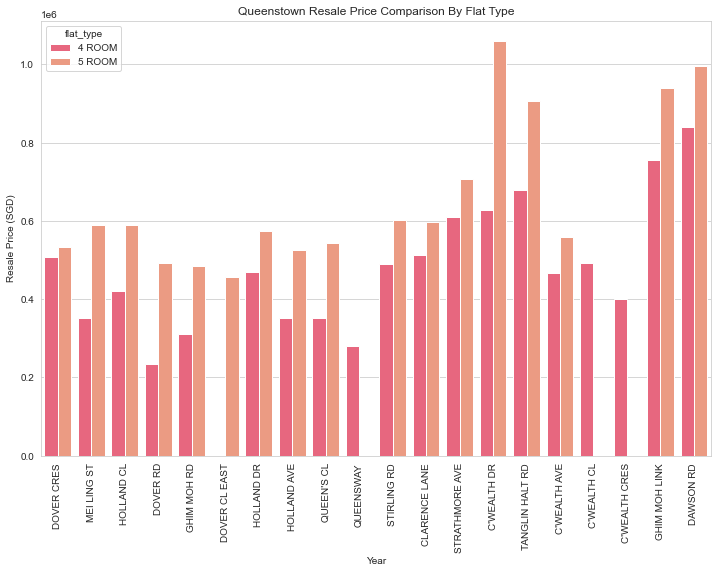

In [31]:
sns.set_style("whitegrid")
fig = plt.gcf()
fig.set_size_inches(12, 8)
ax = sns.barplot(x = 'street_name', y = 'resale_price', data = qt_hdb, ci = None, hue = 'flat_type', palette = palette)
plt.title('Queenstown Resale Price Comparison By Flat Type')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Resale Price (SGD)')

In [37]:
#Finding out mean of remaining lease and commence date by town
street = qt_hdb_4rm.groupby('street_name').mean().sort_values('current_remaining_lease')
street5 = qt_hdb_5rm.groupby('street_name').mean().sort_values('current_remaining_lease')

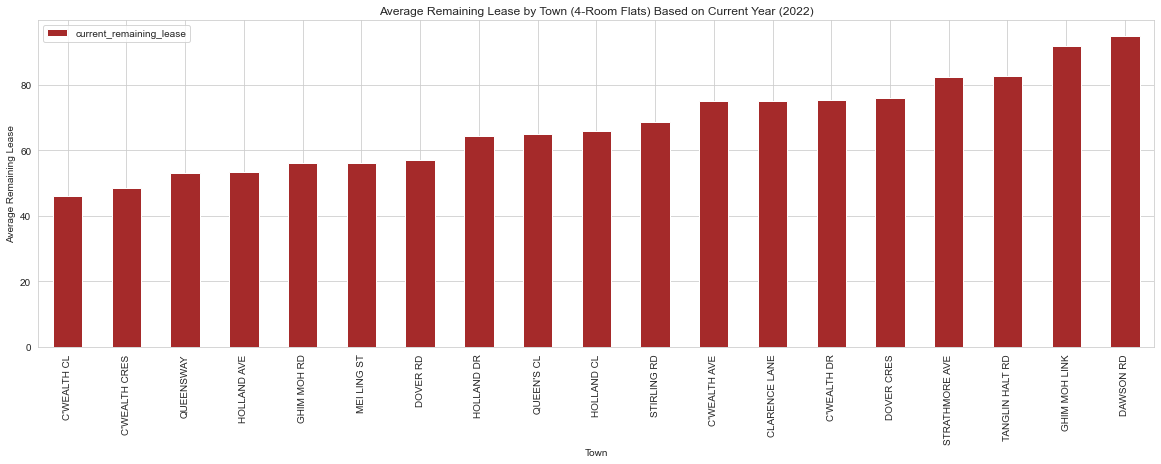

In [39]:
street.plot(kind='bar', y = 'current_remaining_lease', figsize=(20, 6), color = 'brown')
plt.title('Average Remaining Lease by Town (4-Room Flats) Based on Current Year (2022)')
plt.xticks(rotation='vertical')
plt.xlabel('Town')
plt.ylabel('Average Remaining Lease')
plt.show()

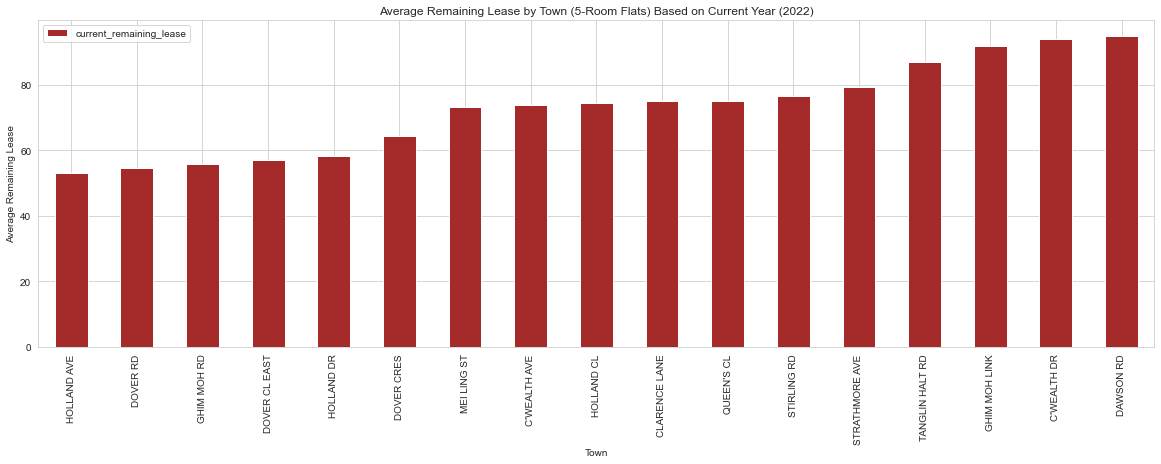

In [40]:
street5.plot(kind='bar', y = 'current_remaining_lease', figsize=(20, 6), color = 'brown')
plt.title('Average Remaining Lease by Town (5-Room Flats) Based on Current Year (2022)')
plt.xticks(rotation='vertical')
plt.xlabel('Town')
plt.ylabel('Average Remaining Lease')
plt.show()

## QUEENSTOWN RESALE PRICE PREDICTION 

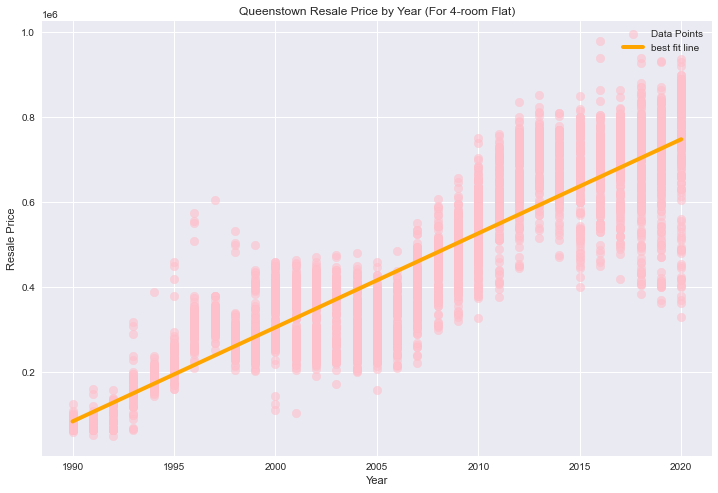

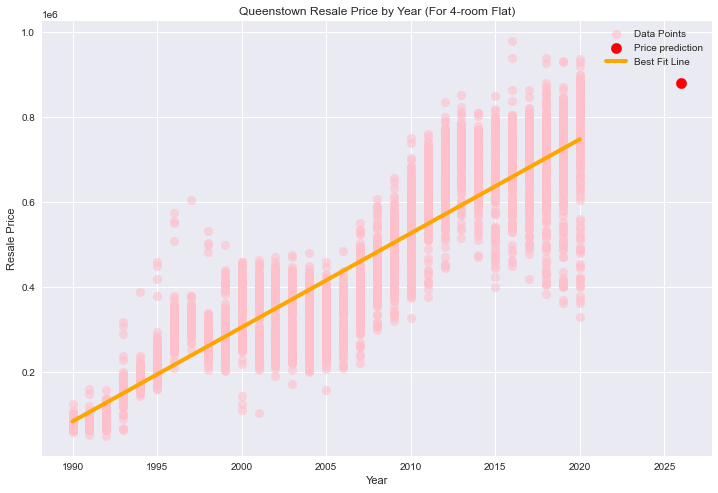

880890.8512290344


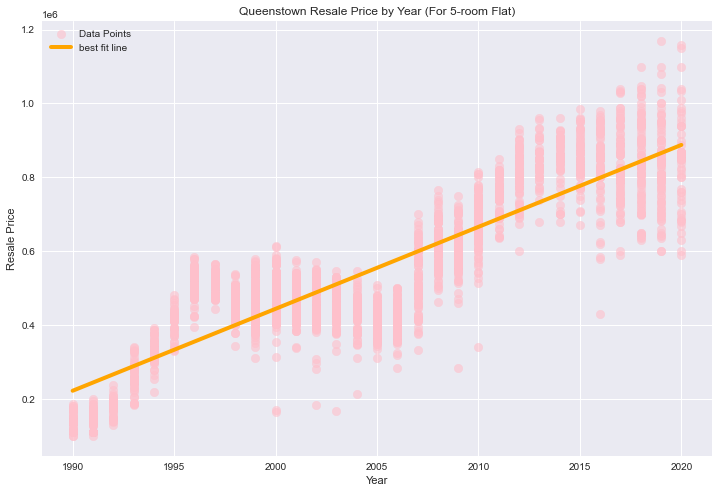

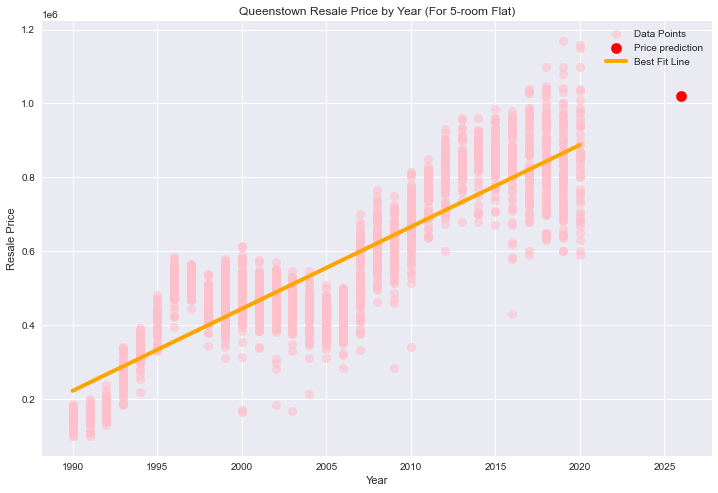

1020953.9102565348


In [41]:
xs = np.array(qt_hdb_4rm['year'], dtype=np.float64)
ys = np.array(qt_hdb_4rm['resale_price'], dtype=np.float64)

pricearea = linear_model.LinearRegression()
pricearea.fit(xs.reshape(-1, 1),ys)
regression_line = pricearea.predict(xs.reshape(-1, 1))

style.use('seaborn')
fig = plt.figure(figsize=(12, 8))
plt.scatter(xs,ys,label='Data Points', alpha=0.6, color='pink', s=75)
plt.plot(xs,regression_line, label="best fit line", color='orange', linewidth=4)
plt.title('Queenstown Resale Price by Year (For 4-room Flat)')
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.legend()
plt.show()

test_year = 2026
pred_price = pricearea.predict(np.array([[test_year]]))[0]

style.use('seaborn')
fig = plt.figure(figsize=(12, 8))
plt.scatter(xs,ys,label='Data Points', alpha=0.6, color='pink', s=75)
plt.scatter(test_year, pred_price, label="Price prediction", color='red', s=110)
plt.plot(xs,regression_line, label="Best Fit Line", color='orange', linewidth=4)
plt.title('Queenstown Resale Price by Year (For 4-room Flat)')
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.legend()
plt.show()

print(pred_price)

#Create another one for 5-Room
bs = np.array(qt_hdb_5rm['year'], dtype=np.float64)
cs = np.array(qt_hdb_5rm['resale_price'], dtype=np.float64)

pricearea = linear_model.LinearRegression()
pricearea.fit(bs.reshape(-1, 1),cs)
regression_line = pricearea.predict(bs.reshape(-1, 1))

style.use('seaborn')
fig = plt.figure(figsize=(12, 8))
plt.scatter(bs,cs,label='Data Points', alpha=0.6, color='pink', s=75)
plt.plot(bs,regression_line, label="best fit line", color='orange', linewidth=4)
plt.title('Queenstown Resale Price by Year (For 5-room Flat)')
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.legend()
plt.show()

test_year = 2026
pred_price = pricearea.predict(np.array([[test_year]]))[0]

style.use('seaborn')
fig = plt.figure(figsize=(12, 8))
plt.scatter(bs,cs,label='Data Points', alpha=0.6, color='pink', s=75)
plt.scatter(test_year, pred_price, label="Price prediction", color='red', s=110)
plt.plot(bs,regression_line, label="Best Fit Line", color='orange', linewidth=4)
plt.title('Queenstown Resale Price by Year (For 5-room Flat)')
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.legend()
plt.show()

print(pred_price)

## CHECKING ON R2 SCORE 

In [42]:
X = qt_hdb_4rm['year'].values
y = qt_hdb_4rm['resale_price'].values

In [43]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X.shape, y.shape

((3922, 1), (3922, 1))

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.01, random_state = 0)

In [45]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3882, 1) (40, 1) (3882, 1) (40, 1)


In [46]:
from sklearn.linear_model import LinearRegression
model_fit = LinearRegression()
model_fit.fit(X_train, y_train)

LinearRegression()

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = regressor.predict(X_test)
print(y_pred)

[[261536.02777801]
 [659791.91818026]
 [305786.68226715]
 [327912.00951172]
 [659791.91818026]
 [681917.24542483]
 [726167.89991397]
 [726167.89991397]
 [350037.33675629]
 [681917.24542483]
 [748293.22715854]
 [681917.24542483]
 [394287.99124543]
 [283661.35502258]
 [615541.26369112]
 [527039.95471285]
 [261536.02777801]
 [438538.64573456]
 [217285.37328888]
 [593415.93644655]
 [173034.71879973]
 [350037.33675629]
 [527039.95471285]
 [704042.57266939]
 [416413.31849   ]
 [261536.02777801]
 [504914.62746827]
 [681917.24542483]
 [482789.30022371]
 [504914.62746827]
 [681917.24542483]
 [416413.31849   ]
 [283661.35502258]
 [659791.91818026]
 [283661.35502258]
 [704042.57266939]
 [748293.22715854]
 [217285.37328888]
 [261536.02777801]
 [571290.60920198]]


In [49]:
print (regressor.coef_)

[[22125.32724457]]


In [50]:
print (regressor.intercept_)

[-43944867.80687136]


In [51]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8532172530474018